# **The main objective of this analysis will be prediction**

## About the Dataset

**Context**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

**Content**

* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
print(data['cut'].unique())
print(data['clarity'].unique())
print(data['color'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
['E' 'I' 'J' 'H' 'F' 'G' 'D']


In [ ]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace = True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
col_names = {'carat': 'weight',
             'cut': 'quality',
             'depth': '%depth',
             'x': 'length',
             'y': 'width',
             'z': 'depth'}

data.rename(columns=col_names, inplace=True)
data.head()


,weight,quality,color,clarity,%depth,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.groupby(by="quality")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
quality,,,,,,,,
Fair,1610.0,4358.757764,3560.386612,337.0,2050.25,3282.0,5205.50,18574.0
Good,4906.0,3928.864452,3681.589584,327.0,1145.00,3050.5,5028.00,18788.0
Ideal,21551.0,3457.541970,3808.401172,326.0,878.00,1810.0,4678.50,18806.0
Premium,13791.0,4584.257704,4349.204961,326.0,1046.00,3185.0,6296.00,18823.0
Very Good,12082.0,3981.759891,3935.862161,336.0,912.00,2648.0,5372.75,18818.0


In [ ]:
data.groupby(by="color")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
D,6775.0,3169.954096,3356.590935,357.0,911.0,1838.0,4213.50,18693.0
E,9797.0,3076.752475,3344.158685,326.0,882.0,1739.0,4003.00,18731.0
F,9542.0,3724.886397,3784.992007,342.0,982.0,2343.5,4868.25,18791.0
G,11292.0,3999.135671,4051.102846,354.0,931.0,2242.0,6048.00,18818.0
H,8304.0,4486.669196,4215.944171,337.0,984.0,3460.0,5980.25,18803.0
I,5422.0,5091.874954,4722.387604,334.0,1120.5,3730.0,7201.75,18823.0
J,2808.0,5323.818020,4438.187251,335.0,1860.5,4234.0,7695.00,18710.0


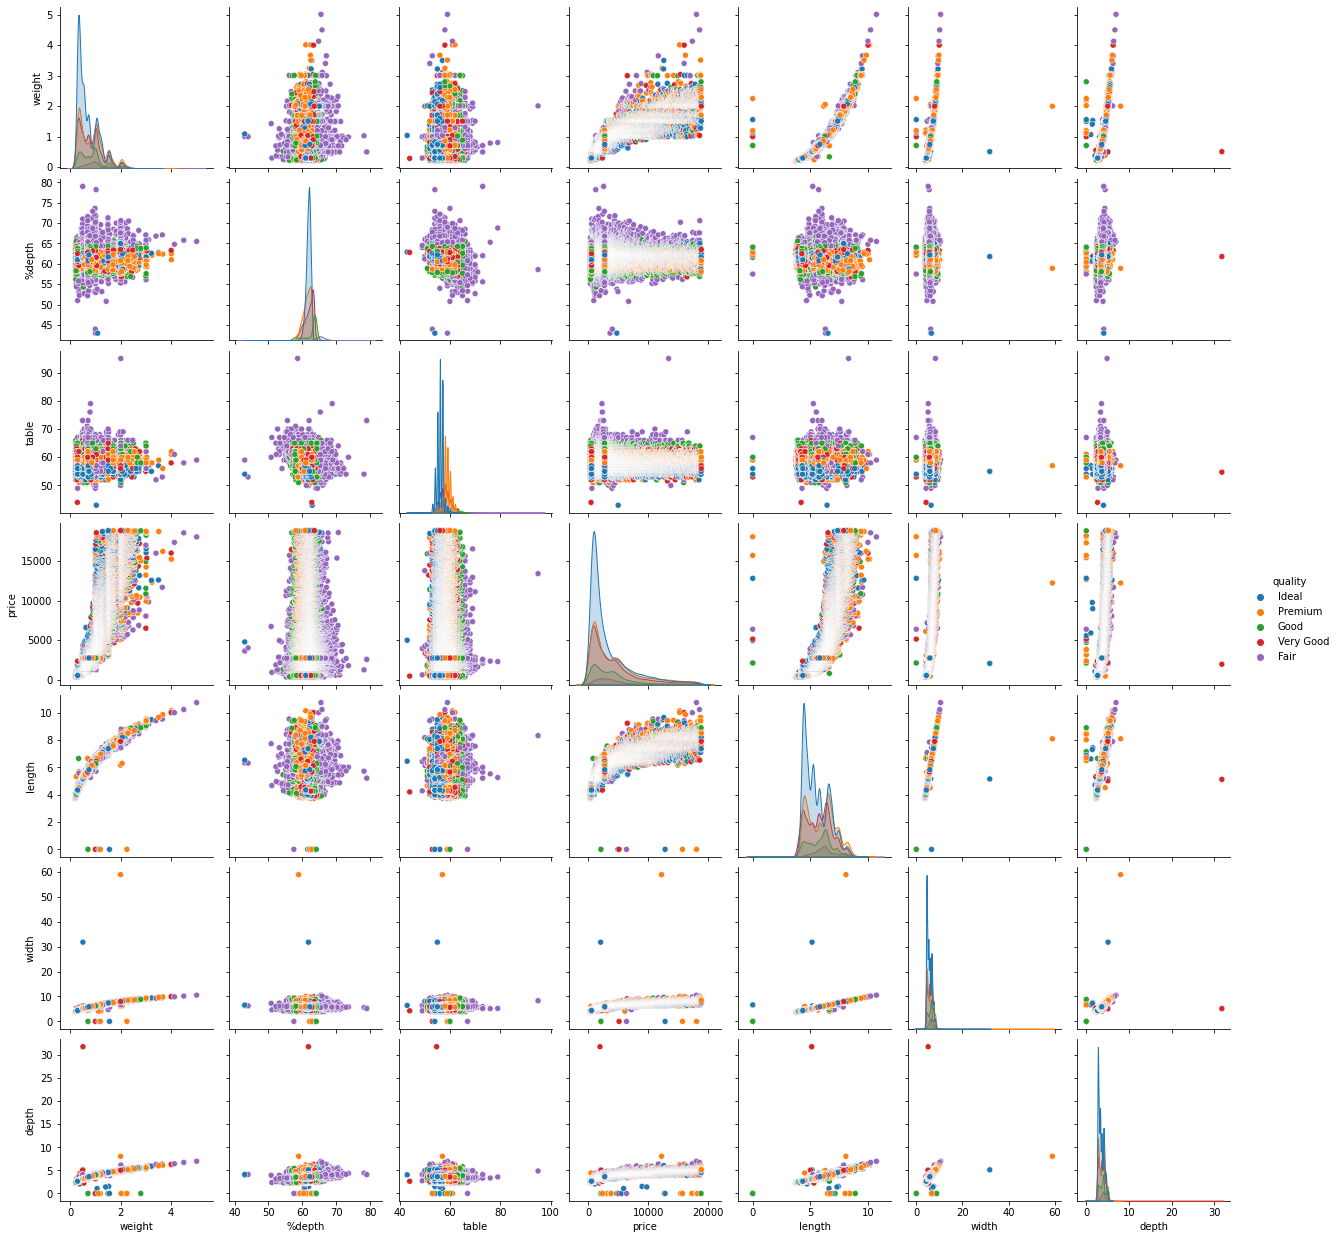

In [ ]:
sns.pairplot(data, hue = 'quality')

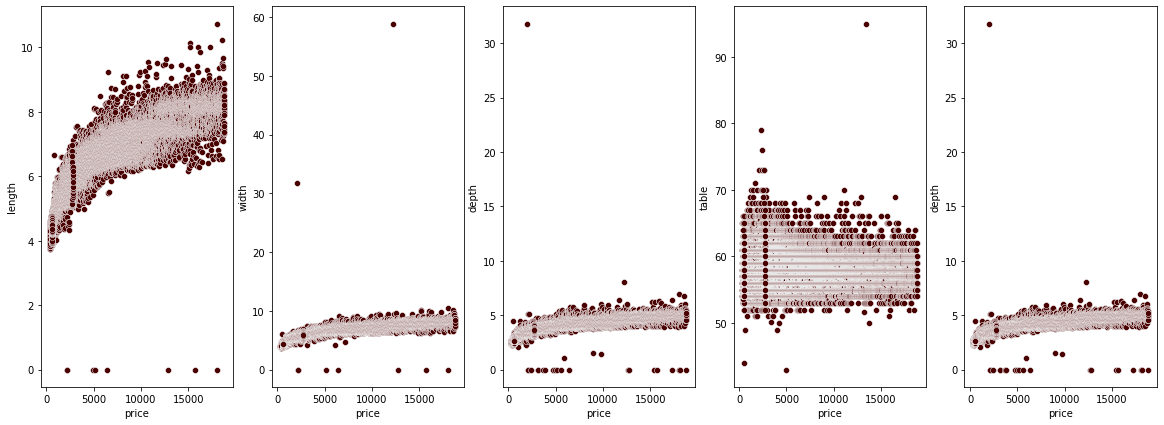

In [ ]:
sns.set_palette("afmhot")
cols = ['length','width', 'depth', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = data, x = data['price'], y = data[i], ax = axs[c])
    c+=1

In [ ]:
data.shape

(53940, 10)

In [ ]:
data = data[(data['length'] < 30)]
data = data[(data['width'] < 30)]
data = data[(data['depth'] < 30) & (data['depth'] > 2)]
data = data[(data['table'] < 80) & (data['table'] > 40)]
data = data[(data['%depth'] < 75) & (data['%depth'] > 45)]

data.shape

(53907, 10)

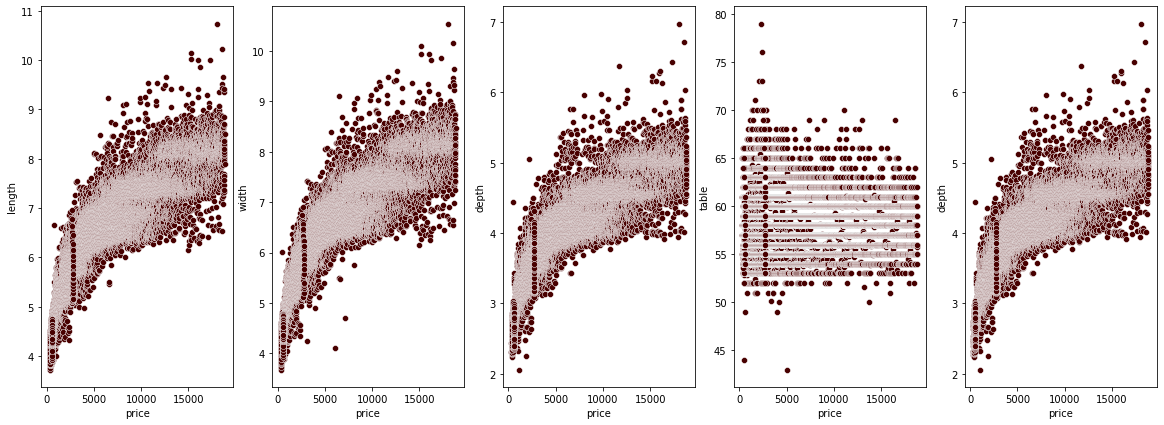

In [ ]:
sns.set_palette("afmhot")
cols = ['length','width', 'depth', 'table', 'depth']
c = 0

fig, axs = plt.subplots(ncols = len(cols), figsize=(20,7))

for i in cols:
    sns.scatterplot(data = data, x = data['price'], y = data[i], ax = axs[c])
    c+=1

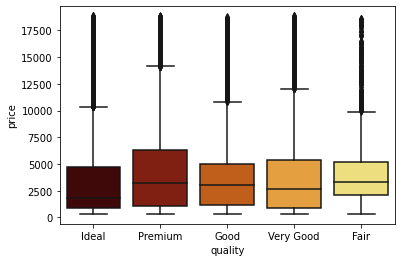

In [ ]:
sns.boxplot(data=data,y="price",x="quality");

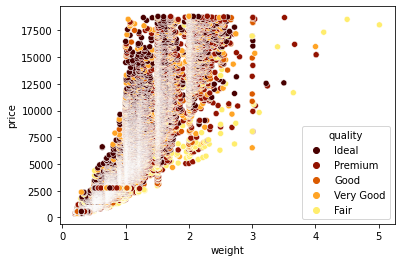

In [ ]:
sns.scatterplot(data=data,x="weight",y="price",hue="quality")
plt.show()

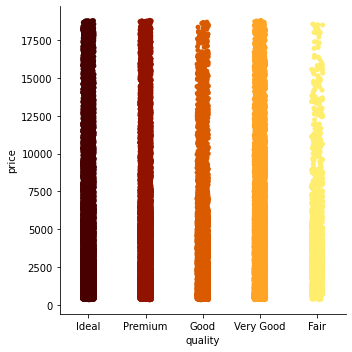

In [ ]:
sns.catplot(data=data,x="quality",y="price");

In [ ]:
#Converting Categorial to numeric values

cats = ['color', 'quality', 'clarity']

for i in cats:
    data[i+'_numeric'] = pd.factorize(data[i])[0]
    data.drop(i, axis = 1, inplace = True)


**Colors:**

E = 0, I = 1, J = 2, H = 3, F = 4, G = 5, D = 6


**Cuts:**

Ideal = 0, Premium = 1, Good = 2, Very Good = 3, Fair = 4

**Clarity:**

SI2= 0, SI1 = 1, VS1 = 2, VS2 = 3, VVS2 = 4, VVS1 = 5, I1 = 6, IF = 7


So, now we have a dataframe with only numeric values:

In [ ]:
data = data.rename(columns = {'color_numeric': 'color', 'cut_numeric': 'quality', 'clarity_numeric': 'clarity'})
data.head()

,weight,%depth,table,price,length,width,depth,color,quality_numeric,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,1
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,2,2
3,0.29,62.4,58.0,334,4.20,4.23,2.63,1,1,3
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,2,0


In [ ]:
data.corr()

,weight,%depth,table,price,length,width,depth,color,quality_numeric,clarity
weight,1.000000,0.029267,0.181797,0.921590,0.977777,0.976860,0.977037,-0.065627,0.114561,-0.281252
%depth,0.029267,1.000000,-0.302218,-0.010287,-0.024401,-0.027543,0.097525,-0.000314,0.170914,-0.026757
table,0.181797,-0.302218,1.000000,0.127108,0.196327,0.190153,0.155670,-0.034132,0.382303,-0.134037
price,0.921590,-0.010287,0.127108,1.000000,0.887212,0.888807,0.882634,-0.016733,0.049563,-0.140147
length,0.977777,-0.024401,0.196327,0.887212,1.000000,0.998657,0.991665,-0.055139,0.105911,-0.306834
width,0.976860,-0.027543,0.190153,0.888807,0.998657,1.000000,0.991327,-0.055317,0.109280,-0.304261
depth,0.977037,0.097525,0.155670,0.882634,0.991665,0.991327,1.000000,-0.054786,0.128134,-0.306563
color,-0.065627,-0.000314,-0.034132,-0.016733,-0.055139,-0.055317,-0.054786,1.000000,-0.029074,0.032655
quality_numeric,0.114561,0.170914,0.382303,0.049563,0.105911,0.109280,0.128134,-0.029074,1.000000,-0.118869
clarity,-0.281252,-0.026757,-0.134037,-0.140147,-0.306834,-0.304261,-0.306563,0.032655,-0.118869,1.000000


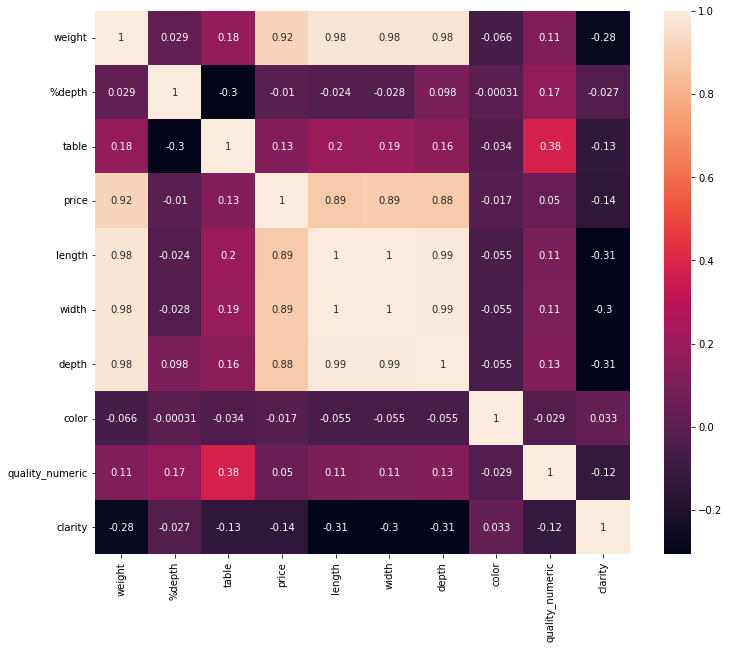

In [ ]:
figure, ax = plt.subplots(figsize=(12,10))

sns.heatmap(data.corr(), annot = True)

##### We can observe high correlations from length, width and depth to the price. These other features show low correlation to the price.

In [ ]:
data.drop(['length', 'width', 'depth'], axis=1, inplace = True)

**Brief summary of the EDA and cleaning done above**

Information about the data was first obtained using .describe and .info to see the mean, max, standard deviation, number of categorical and numerical columns etc. to have a basic understanding of the dataset. It was then checked for missing values and none were found. Some columns where renamed for better understanding of the dataset. Arguments from searborn where used to obtain different plot of the dataset such as pairplot, scatter, boxplot etc. Graphical method was also used to check for outliers in length,width, depth, table, depth and some were found and dealt with by removing them, a total of 13 rows were removed.  Pearson's correlation coefficient was calulated using .corr_ method with the aim of finding correlations between the columns and was concluded after the test that length, with, and depth were of least importance in predicting the price of a diamond.

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
X = data.drop('price', axis = 1)
y = data['price']
X.head()

,weight,%depth,table,color,quality_numeric,clarity
0,0.23,61.5,55.0,0,0,0
1,0.21,59.8,61.0,0,1,1
2,0.23,56.9,65.0,0,2,2
3,0.29,62.4,58.0,1,1,3
4,0.31,63.3,58.0,2,2,0


In [ ]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [ ]:
s = StandardScaler()
lr = LinearRegression()
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

predictions = cross_val_predict(estimator, X, y, cv=kf)
r2_score(y, predictions)

0.8699707256730556

In [ ]:
s = StandardScaler()
las = Lasso()
estimator = Pipeline([("scaler", s),
                      ("regression", las)])

predictions1 = cross_val_predict(estimator, X, y, cv=kf)
r2_score(y, predictions1)

0.8699702911935887

In [ ]:
s = StandardScaler()
rd = Ridge()
estimator = Pipeline([("scaler", s),
                      ("regression", rd)])

predictions2 = cross_val_predict(estimator, X, y, cv=kf)
r2_score(y, predictions2)

0.8699707274649788

In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("lasso_regression", Lasso())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

grid.fit(X, y)

grid.best_score_, grid.best_params_

(0.9242962660815178,
 {'lasso_regression__alpha': 4.0, 'polynomial_features__degree': 3})

In [ ]:
y_predict = grid.predict(X)


r2_score(y, y_predict)

0.9270959792076017

In [ ]:
grid.best_estimator_.named_steps['lasso_regression'].coef_!=0

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True])

In [ ]:
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid1 = GridSearchCV(estimator, params, cv=kf)

grid1.fit(X, y)

grid1.best_score_, grid1.best_params_

(0.9242871606643632,
 {'polynomial_features__degree': 3, 'ridge_regression__alpha': 20.0})

In [ ]:
y_predict1 = grid1.predict(X)
# This includes both in-sample and out-of-sample
r2_score(y, y_predict1)

0.9272422226839756

In [ ]:
grid1.best_estimator_.named_steps['ridge_regression'].coef_!=0

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

Models devoloped for this project consists of two sections, the first section contains plain models, standard scaler and cross validation for spliting the dataset. The second section contains polynominal features, regularized models and gridsearchcv for predictions. The results of the first section had very similar R2 scores with variations only appearing at the sixth decimal place downward. The second section also had similar results but were much better in-terms of accuracy than the first sections. As expected, Lasso regression performed more feature selection than Ridge as it zeroed out more coefficients compared to ridge. An alpha of 4 and polynominal degree of 3 were the best parameters for lasso regression while alpha of 20 and polynominal degree of 3 were found ro be the best for ridge. Kfold of 3 was used throughout the notebook. Of all the models trained in the notebook, ridge regression was found to have the highest accuracy with r2 score of 0.92724 and will be recommended for deployment not just because of having the highest score but also not removing coefficients that might be useful in real world application. Suggestions for further analysis to further model accuracy might include additional data/columns like mining site etc., further feature engineering, the use of other regression models such as elasticnet etc.